# Face-to-BMI
***
## Machine Learning II

By Amulya Jayanti | Halleluya Mengesha | Hira Stanley | Sami Naeem | Vaishnavi Kokadwar
  
*May, 2025*
***

The objective is to replicate and improve upon **Face-to-BMI** system described in the paper "***Face-to-BMI: Using Computer Vision to Infer Body Mass Index on Social Media***".

In the paper, the model pipeline includes the use of **VGG-Face** for feature extraction → **Support Vector Regression** (**SVR**) for **BMI prediction**. 

**Benchmark results** to beat are **Pearson r** values of:
- **0.65 overall**, 
- **0.71 males**, 
- **0.57 females**

# PART 1 - Load, Clean and Understand the Dataset

## 1.1. Load and clean

In [1]:
import os
import warnings
import absl.logging
from PIL import Image
import numpy as np
import pandas as pd
import tensorflow as tf

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings("ignore")
absl.logging.set_verbosity(absl.logging.ERROR)

print("Current Working Directory:", os.getcwd())

/Users/halleluyamengesha/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Current Working Directory: /Users/halleluyamengesha/Desktop/UChicago/_Quarter_3/Machine Learning II/Project


In [2]:
# Correct path based on nested folder
base_dir = '/Users/halleluyamengesha/Desktop/UChicago/_Quarter_3/Machine Learning II/Project/BMI/Data'
csv_path = os.path.join(base_dir, 'data.csv')

# Load CSV
df = pd.read_csv(csv_path)

# Create full image paths
df['image_path'] = df['name'].apply(lambda x: os.path.join(base_dir, x))

# Show a sample
print("Data Sample:")
df

Data Sample:


,Unnamed: 0,bmi,gender,is_training,name,image_path
0,0,34.207396,Male,1,img_0.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...
1,1,26.453720,Male,1,img_1.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...
2,2,34.967561,Female,1,img_2.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...
3,3,22.044766,Female,1,img_3.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...
4,4,37.758789,Female,1,img_4.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...
...,...,...,...,...,...,...
4201,4201,34.078947,Male,0,img_4201.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...
4202,4202,34.564776,Female,0,img_4202.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...
4203,4203,27.432362,Female,0,img_4203.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...
4204,4204,40.492800,Male,0,img_4204.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...


In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df

,bmi,gender,is_training,name,image_path
0,34.207396,Male,1,img_0.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...
1,26.453720,Male,1,img_1.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...
2,34.967561,Female,1,img_2.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...
3,22.044766,Female,1,img_3.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...
4,37.758789,Female,1,img_4.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...
...,...,...,...,...,...
4201,34.078947,Male,0,img_4201.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...
4202,34.564776,Female,0,img_4202.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...
4203,27.432362,Female,0,img_4203.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...
4204,40.492800,Male,0,img_4204.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...


In [4]:
# Info & stats
print("\nInfo:")
df.info()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4206 entries, 0 to 4205
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bmi          4206 non-null   float64
 1   gender       4206 non-null   object 
 2   is_training  4206 non-null   int64  
 3   name         4206 non-null   object 
 4   image_path   4206 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 164.4+ KB


In [5]:
print("\n Missing values:")
df.isnull().sum()


 Missing values:


bmi            0
gender         0
is_training    0
name           0
image_path     0
dtype: int64

In [6]:
print("\nGender count:")
gender_counts = df['gender'].value_counts()
gender_percentages = df['gender'].value_counts(normalize=True) * 100
for gender, count in gender_counts.items():
    print(f"{gender}: {count} ({gender_percentages[gender]:.2f}%)")


Gender count:
Male: 2438 (57.96%)
Female: 1768 (42.04%)


In [7]:
print("\nTrain/test split:")
split_counts = df['is_training'].value_counts()
split_percentages = df['is_training'].value_counts(normalize=True) * 100
for split, count in split_counts.items():
    print(f"{split}: {count} ({split_percentages[split]:.2f}%)")


Train/test split:
1: 3368 (80.08%)
0: 838 (19.92%)


In [8]:
# Correct image folder path
image_dir = '/Users/halleluyamengesha/Desktop/UChicago/_Quarter_3/Machine Learning II/Project/BMI/Data/Images'

# Update the full image paths
df['image_path'] = df['name'].apply(lambda x: os.path.join(image_dir, x.strip()))

# Check if the images now exist
df['image_exists'] = df['image_path'].apply(os.path.exists)

# Report missing files
missing = df[~df['image_exists']]
print(f"Missing image files: {len(missing)}")
if not missing.empty:
    print(missing[['name', 'image_path']].head())

Missing image files: 244
          name                                         image_path
4    img_4.bmp  /Users/halleluyamengesha/Desktop/UChicago/_Qua...
5    img_5.bmp  /Users/halleluyamengesha/Desktop/UChicago/_Qua...
40  img_40.bmp  /Users/halleluyamengesha/Desktop/UChicago/_Qua...
86  img_86.bmp  /Users/halleluyamengesha/Desktop/UChicago/_Qua...
93  img_93.bmp  /Users/halleluyamengesha/Desktop/UChicago/_Qua...


In [9]:
# Check number of files
image_files = os.listdir(image_dir)
print(f"Total files in Images/: {len(image_files)}")

Total files in Images/: 3963


In [10]:
# Keep only available images
df_valid = df[df['image_exists']].reset_index(drop=True)

print(f"✅ Valid image rows: {len(df_valid)}")
print(f"❌ Removed rows with missing images: {len(df) - len(df_valid)}")


✅ Valid image rows: 3962
❌ Removed rows with missing images: 244


In [11]:
df_valid

,bmi,gender,is_training,name,image_path,image_exists
0,34.207396,Male,1,img_0.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...,True
1,26.453720,Male,1,img_1.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...,True
2,34.967561,Female,1,img_2.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...,True
3,22.044766,Female,1,img_3.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...,True
4,25.845588,Female,1,img_6.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...,True
...,...,...,...,...,...,...
3957,34.078947,Male,0,img_4201.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...,True
3958,34.564776,Female,0,img_4202.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...,True
3959,27.432362,Female,0,img_4203.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...,True
3960,40.492800,Male,0,img_4204.bmp,/Users/halleluyamengesha/Desktop/UChicago/_Qua...,True


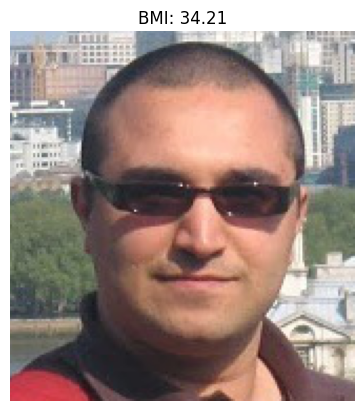

In [12]:
# View sample picture

from PIL import Image
import matplotlib.pyplot as plt

sample_path = df_valid['image_path'].iloc[0]
img = Image.open(sample_path)

plt.imshow(img)
plt.title(f"BMI: {df_valid['bmi'].iloc[0]:.2f}")
plt.axis('off')
plt.show()


## 1.2. Exploratory Data Analysis (EDA)

XXXX